# Lab 8 : Star Formation 

In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [3]:
def StarFormationRate(L, type, TIR=0):
    if (type == 'FUV'):
        LogCx = 43.35 #Calibration from L to SFR from Table 1 (K&E 2012)
        TIRc = 0.46 #correction for dust absorption from Table 2
    elif (type == 'NUV'):
        LogCx = 43.17
        TIRc = 0.27
    elif (type == 'Halpha'):
        LogCx = 41.27
        TIRc = 0.0024
    elif (type == 'TIR'):
        LogCx = 43.41
        TIRc = 0
    else:
        print("Missing Wavelength: FUV, NUV, Halpha, TIR")
        
    #Correct the Luminosity for dust
    Lnew = L + TIRc*TIR
    return np.log10(Lnew) - LogCx

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [4]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [5]:
#  WLM Dwarf Irregular Galaxy
#Lee et al. 2009 WLM galaxy log(SFR) derived from UV is -2.21 --> Galex
#From NED : WLM NUV luminosity (GAL)

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS

StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)

-2.3373504191027266

In [6]:
#  N24 Sc galaxy

NUV_N24 = 2.96e8*LsunErgS
TIR_N24 = 3.09e8*LsunErgS

StarFormationRate(NUV_N24, 'NUV', TIR_N24)

-1.0078964050716621

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [7]:
#Create a function that returns the SFR main sequence
def SFRMainSequence(Mstar, z):
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    return alpha*(np.log10(Mstar) - 10.5) + beta

In [8]:
# MW at z=0

10**SFRMainSequence(6e10, 0)
#actual star formation rate of the MW is only 1 Msun/year

3.7558295562247412

In [9]:
# MW at z = 1

10**SFRMainSequence(6e10, 4)

89.13889068294495

In [10]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

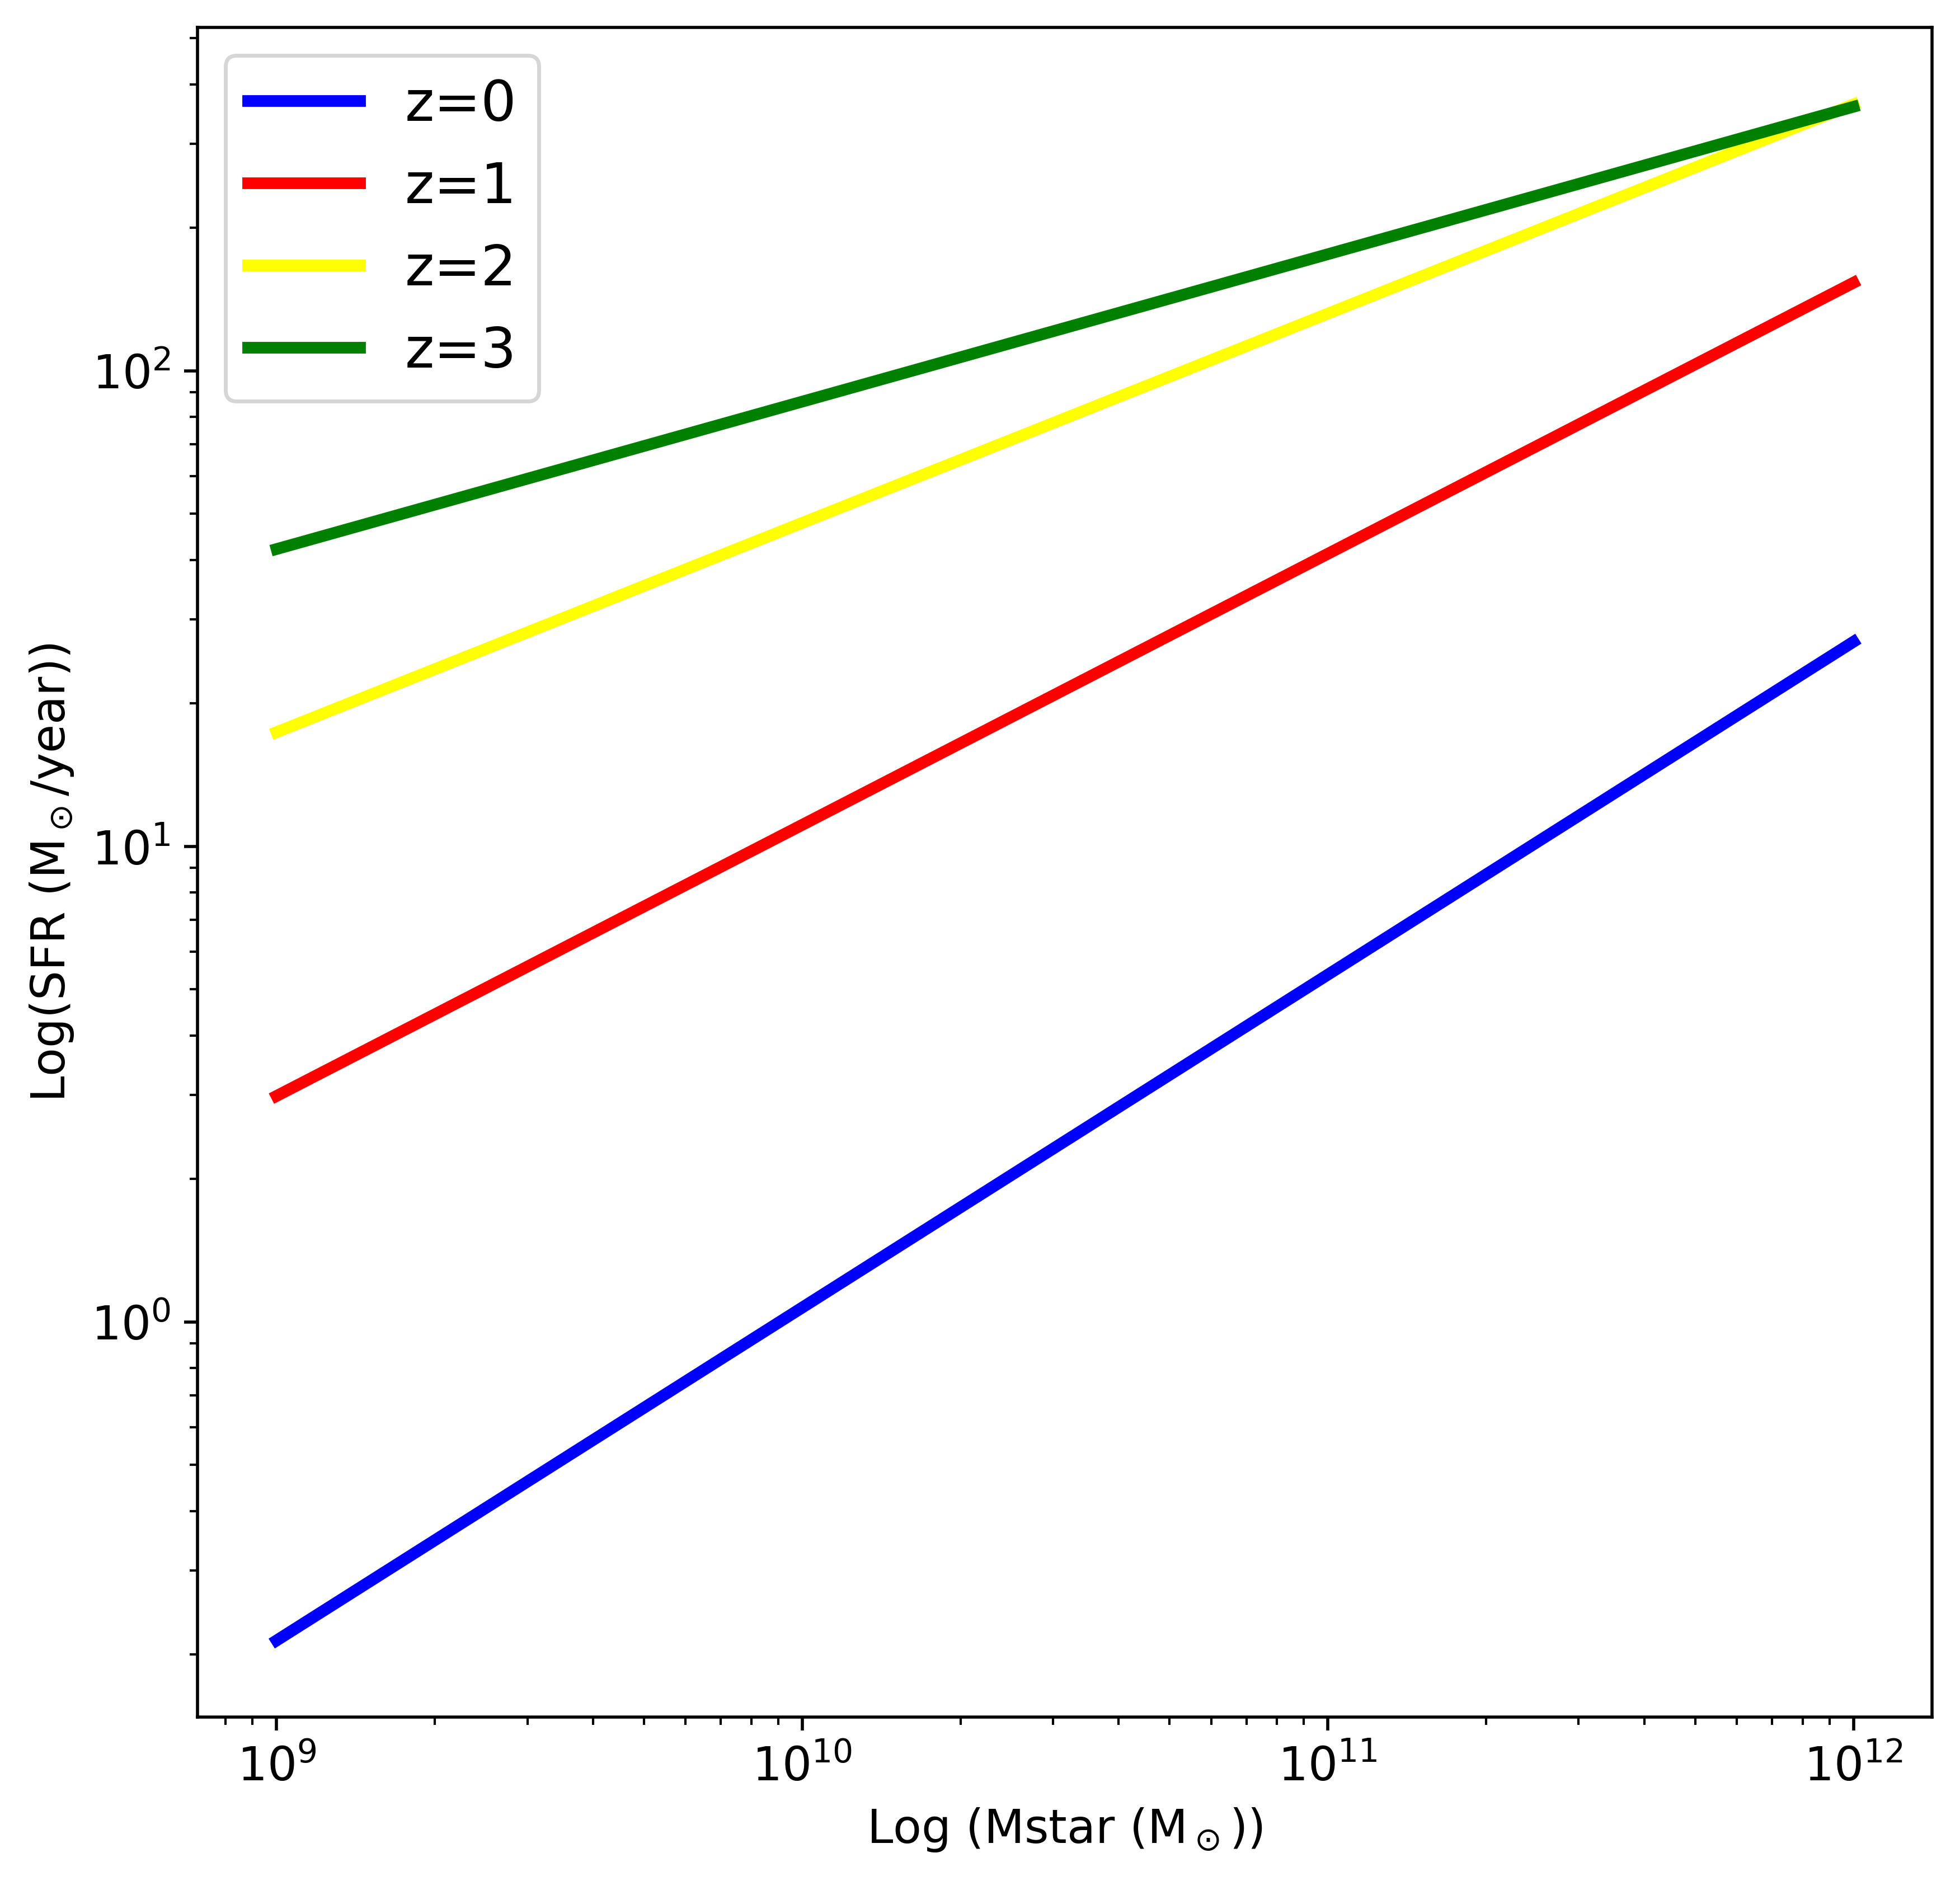

In [20]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass, 0), color='blue', linewidth=3, label='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 1), color='red', linewidth=3, label='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 2), color='yellow', linewidth=3, label='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 3), color='green', linewidth=3, label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [11]:
# normal galaxies 

TIR_Normal = 1e10*LsunErgS
10**StarFormationRate(TIR_Normal, "TIR")

1.4892648150381245

In [12]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
10**StarFormationRate(TIR_LIRG, "TIR")

1.4892648150381245

In [13]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
10**StarFormationRate(TIR_ULIRG, "TIR")

148.92648150381245

In [14]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
10**StarFormationRate(TIR_HLIRG, "TIR")

1489.2648150381244